# PROJECT 3_PANDAS_NIHAYA_DIAB
## נתוני הערכת עובדים 
###  התפלגות ציוני הערכת עובדים, קשר בין מספר פרמטרים (מגדר, דירוג) העובד לציון הסופי
### לצד ניתוח עובדים מצטיינים/לא מצטיינים
###### הערה כללית: בהצגת הגרפים - העברית הקשה מאוד על העבודה עד כדי טיפול בכל גרף בפני עצמו

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
# הגדרות כלליות לגופן ותמיכה בעברית
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # תומך עברית כברירת מחדל
matplotlib.rcParams['axes.unicode_minus'] = False

# פונקציה שתכפה כיווניות ימין־לשמאל
def rtl(s):
    return "\u202B" + s + "\u202C"
import warnings
warnings.filterwarnings('ignore')

#### טעינה וסקירת הנתונים
#### ה -DataFrame כולל, בין היתר, עמודות רקע של העובדים שהוצלבו לתוצאות הערכת עובד

In [2]:
dfEMP=pd.read_excel("EMPLOYEES2.xlsx")
dfEMP.head(2)

,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,EmployeeID
0,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,24519.0,עובד,2000
1,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,32261.0,עובד,2001


In [3]:
#אקלוט  טבלה שנייה ואיצור טבלה אחת כוללת

In [4]:
dfEVA=pd.read_excel("EVALUATION2.xlsx")
dfEVA.head(3)

,EmployeeID,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent
0,4547,5.00,6.00,6.00,6.0,6.0,5.83,5.5,0
1,3679,NaN,6.00,6.00,6.0,5.8,5.96,NaN,0
2,4816,4.43,4.33,4.25,4.2,4.4,4.30,4.5,0


In [5]:
df = pd.merge(
    dfEMP,
    dfEVA,
    on='EmployeeID',
    how='inner')

In [6]:
df= pd.merge(dfEMP, dfEVA, on='EmployeeID', how='inner')

In [7]:
df.head()

,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,EmployeeID,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent
0,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,24519.0,עובד,2000,NaN,6.50,7.0,6.8,6.6,6.73,6.5,1
1,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,33347.0,עובד,2002,NaN,5.33,5.5,5.6,5.8,5.56,5.0,0
2,39 - 41,"011 מח""ר",מירב,ירושלים,משרדי ממשלה,32098.0,עובד,2004,6.00,6.00,6.0,5.8,5.8,5.92,6.0,0
3,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,32721.0,עובד,2005,5.29,5.83,6.0,5.6,5.8,5.70,6.0,0
4,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,27498.0,עובד,2006,5.50,6.00,6.0,6.0,6.0,5.90,6.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dargot                 2501 non-null   object 
 1   Derog                  2501 non-null   object 
 2   Medrag                 2502 non-null   object 
 3   Area                   2501 non-null   object 
 4   System                 2502 non-null   object 
 5   BirthDate              2502 non-null   float64
 6   Gender                 2502 non-null   object 
 7   EmployeeID             2502 non-null   int64  
 8   Management_mean        690 non-null    float64
 9   WorkValues_mean        2455 non-null   float64
 10  WorkRelations_mean     2455 non-null   float64
 11  Innovation_mean        2451 non-null   float64
 12  Professionalism_mean   2455 non-null   float64
 13  IndividualEvaluation   2455 non-null   float64
 14  PerformanceEvaluation  2276 non-null   float64
 15  Exce

In [9]:
df.describe()
# שדה management שייך רק לקבוצת המנהלים

,BirthDate,EmployeeID,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent
count,2502.000000,2502.000000,690.000000,2455.000000,2455.000000,2451.000000,2455.000000,2455.000000,2276.000000,2502.000000
mean,33785.938050,3865.370903,5.271174,5.468183,5.493234,5.222428,5.438440,5.403438,5.004728,0.148681
std,2080.609236,889.063315,0.849107,0.796724,0.767036,0.831887,0.774761,0.730449,1.096629,0.355845
min,21717.000000,2000.000000,1.000000,1.500000,1.500000,1.000000,1.000000,1.460000,1.000000,0.000000
25%,32693.250000,3200.250000,4.710000,5.000000,5.000000,4.635000,5.000000,4.940000,4.500000,0.000000
50%,33918.000000,3902.500000,5.290000,5.670000,5.750000,5.400000,5.600000,5.540000,5.000000,0.000000
75%,35201.250000,4603.750000,5.860000,6.000000,6.000000,5.800000,6.000000,5.860000,6.000000,0.000000
max,38318.000000,5328.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


In [10]:
df.set_index("EmployeeID",inplace=True)
#מספר  העובד כאינדקס
df.head()

,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent
EmployeeID,,,,,,,,,,,,,,,
2000,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,24519.0,עובד,NaN,6.50,7.0,6.8,6.6,6.73,6.5,1
2002,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,33347.0,עובד,NaN,5.33,5.5,5.6,5.8,5.56,5.0,0
2004,39 - 41,"011 מח""ר",מירב,ירושלים,משרדי ממשלה,32098.0,עובד,6.00,6.00,6.0,5.8,5.8,5.92,6.0,0
2005,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,32721.0,עובד,5.29,5.83,6.0,5.6,5.8,5.70,6.0,0
2006,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,27498.0,עובד,5.50,6.00,6.0,6.0,6.0,5.90,6.0,0


#### טיפול בנתונים
##### שדה תאריך זוהה כטקסט ויומר לתאריך- יחושב גיל העובד
##### חסרים: Management_mean חסר (NaN) לעובדים שאינם מנהלים — נשאר כ-NaN כדי לא להטות ממוצעים.
##### סינון רשומות לא שלמות: העובדים החדשים ללא ציוני הערכה הוצאו מניתוחי הביצועים כדי לא לעוות ממצאים.

In [11]:
missing_eval = df[
    df[['WorkValues_mean', 'WorkRelations_mean', 'Innovation_mean', 'Professionalism_mean']].isna().all(axis=1)
]

print(f"נמצאו {len(missing_eval)} עובדים ללא נתוני הערכה.")
missing_eval.head(5)

נמצאו 47 עובדים ללא נתוני הערכה.


,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent
EmployeeID,,,,,,,,,,,,,,,
2020,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,30808.0,עובד,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,31725.0,עובד,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2037,40 - 42,"011 מח""ר",תיכון,ירושלים,מערכת הבריאות,32198.0,עובד,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2039,39 - 41,"011 מח""ר",מירב,תל אביב - יפו,משרדי ממשלה,33424.0,עובד,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2042,38 - 40,012 מהנדסים,מירב,אילת,משרדי ממשלה,33044.0,עובד,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
# מחיקת שורות של עובדים שאין להם נתוני הערכה
df2 = df.dropna(
    subset=['WorkValues_mean', 'WorkRelations_mean', 'Innovation_mean', 'Professionalism_mean'],
    how='all'
)

In [13]:
df2.head()

,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent
EmployeeID,,,,,,,,,,,,,,,
2000,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,24519.0,עובד,NaN,6.50,7.0,6.8,6.6,6.73,6.5,1
2002,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,33347.0,עובד,NaN,5.33,5.5,5.6,5.8,5.56,5.0,0
2004,39 - 41,"011 מח""ר",מירב,ירושלים,משרדי ממשלה,32098.0,עובד,6.00,6.00,6.0,5.8,5.8,5.92,6.0,0
2005,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,32721.0,עובד,5.29,5.83,6.0,5.6,5.8,5.70,6.0,0
2006,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,27498.0,עובד,5.50,6.00,6.0,6.0,6.0,5.90,6.0,0


In [14]:
df2.isna().sum()

Dargot                      1
Derog                       1
Medrag                      0
Area                        1
System                      0
BirthDate                   0
Gender                      0
Management_mean          1765
WorkValues_mean             0
WorkRelations_mean          0
Innovation_mean             4
Professionalism_mean        0
IndividualEvaluation        0
PerformanceEvaluation     179
Excellent                   0
dtype: int64

In [15]:
#ניקוי ערכים חסרחם
df2 = df2.dropna(subset=['Dargot', 'Derog', 'Area', 'Innovation_mean', 'PerformanceEvaluation'])

In [16]:
df2.isna().sum()

Dargot                      0
Derog                       0
Medrag                      0
Area                        0
System                      0
BirthDate                   0
Gender                      0
Management_mean          1599
WorkValues_mean             0
WorkRelations_mean          0
Innovation_mean             0
Professionalism_mean        0
IndividualEvaluation        0
PerformanceEvaluation       0
Excellent                   0
dtype: int64

In [17]:
df2['Medrag'].value_counts()

Medrag
מסד         1231
מירב         740
תיכון        279
בכיר          20
ללא מדרג       1
Name: count, dtype: int64

In [18]:
#עובד אחד במדרג""ללא מדרג - יוסר מהרשימה

In [19]:
df2 = df2[df2['Medrag'] != 'ללא מדרג']

In [20]:
df2['Medrag'].value_counts()

Medrag
מסד      1231
מירב      740
תיכון     279
בכיר       20
Name: count, dtype: int64

#### טיפול בשדה תאריך

In [21]:
df2['BirthDate'] = pd.to_numeric(df2['BirthDate'], errors='coerce')

In [22]:
df2.head(2)

,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent
EmployeeID,,,,,,,,,,,,,,,
2000,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,24519.0,עובד,NaN,6.50,7.0,6.8,6.6,6.73,6.5,1
2002,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,33347.0,עובד,NaN,5.33,5.5,5.6,5.8,5.56,5.0,0


In [23]:
df2['BirthDate'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df2['BirthDate'], unit='D')


In [24]:
df2.head(2)

,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent
EmployeeID,,,,,,,,,,,,,,,
2000,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,1967-02-16,עובד,NaN,6.50,7.0,6.8,6.6,6.73,6.5,1
2002,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,1991-04-19,עובד,NaN,5.33,5.5,5.6,5.8,5.56,5.0,0


In [25]:
#חישוב גיל
from datetime import date
today = pd.Timestamp(date.today())
df2['Age'] = ((today - df2['BirthDate']).dt.days // 365).astype('Int64')

In [26]:
df2.head(2)

,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent,Age
EmployeeID,,,,,,,,,,,,,,,,
2000,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,1967-02-16,עובד,NaN,6.50,7.0,6.8,6.6,6.73,6.5,1,58
2002,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,1991-04-19,עובד,NaN,5.33,5.5,5.6,5.8,5.56,5.0,0,34


In [27]:
#חישוב ציון סופי להערכת עובדים
df2['FinalScore'] = (
    df2['IndividualEvaluation'] * 0.7 +
    df2['PerformanceEvaluation'] * 0.3
).round(2)

In [28]:
df2.head(2)

,Dargot,Derog,Medrag,Area,System,BirthDate,Gender,Management_mean,WorkValues_mean,WorkRelations_mean,Innovation_mean,Professionalism_mean,IndividualEvaluation,PerformanceEvaluation,Excellent,Age,FinalScore
EmployeeID,,,,,,,,,,,,,,,,,
2000,40 - 42,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,1967-02-16,עובד,NaN,6.50,7.0,6.8,6.6,6.73,6.5,1,58,6.66
2002,41 - 43,"011 מח""ר",תיכון,ירושלים,משרדי ממשלה,1991-04-19,עובד,NaN,5.33,5.5,5.6,5.8,5.56,5.0,0,34,5.39


In [29]:
df2[['Age','FinalScore','IndividualEvaluation','PerformanceEvaluation']].describe().round(2)
#ניתוח סטטיסטי בסיסי

,Age,FinalScore,IndividualEvaluation,PerformanceEvaluation
count,2270.0,2270.00,2270.00,2270.0
mean,32.74,5.29,5.42,5.0
std,5.69,0.76,0.73,1.1
min,20.0,1.32,1.46,1.0
25%,29.0,4.78,4.95,4.5
50%,32.0,5.40,5.56,5.0
75%,36.0,5.82,5.87,6.0
max,66.0,7.00,7.00,7.0


In [30]:
# טבלת סיכום
summary = df2.pivot_table(
    index='Medrag',     # מדרג
    columns='Gender',   # מגדר
    aggfunc='size', 
    fill_value=0
).reset_index()

summary.columns.name = None  # להסרת כותרת משנה

# חישוב סה"כ ואחוזים
summary['סה״כ'] = summary['עובד'] + summary['עובדת']
summary['% נשים'] = round(summary['עובדת'] / summary['סה״כ'] * 100, 1)
summary['% גברים'] = round(summary['עובד'] / summary['סה״כ'] * 100, 1)

# סידור לפי סדר ספציפי של מדרגים
order = ['בכיר', 'תיכון', 'מירב', 'מסד']
summary['Medrag'] = pd.Categorical(summary['Medrag'], categories=order, ordered=True)
summary = summary.sort_values('Medrag').reset_index(drop=True)

# תוצאה סופית
summary


,Medrag,עובד,עובדת,סה״כ,% נשים,% גברים
0,בכיר,8,12,20,60.0,40.0
1,תיכון,100,179,279,64.2,35.8
2,מירב,200,540,740,73.0,27.0
3,מסד,382,849,1231,69.0,31.0


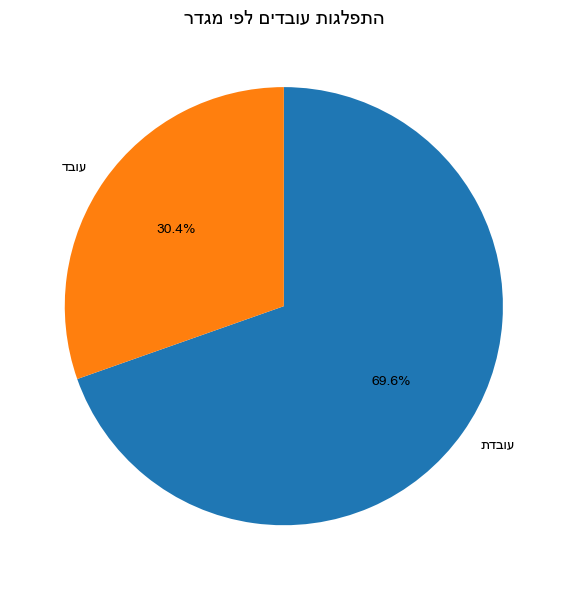

In [31]:
from bidi.algorithm import get_display
import arabic_reshaper

# הגדרות גופן עברי
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

# פונקציה שמכינה טקסט עברי לתצוגה תקינה
def heb(s):
    return get_display(arabic_reshaper.reshape(s))

# === תרשים עוגה מגדרי ===
gender_counts = df2['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=[heb(lbl) for lbl in gender_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)

plt.title(heb('התפלגות עובדים לפי מגדר'), fontsize=14)
plt.tight_layout()
plt.show()


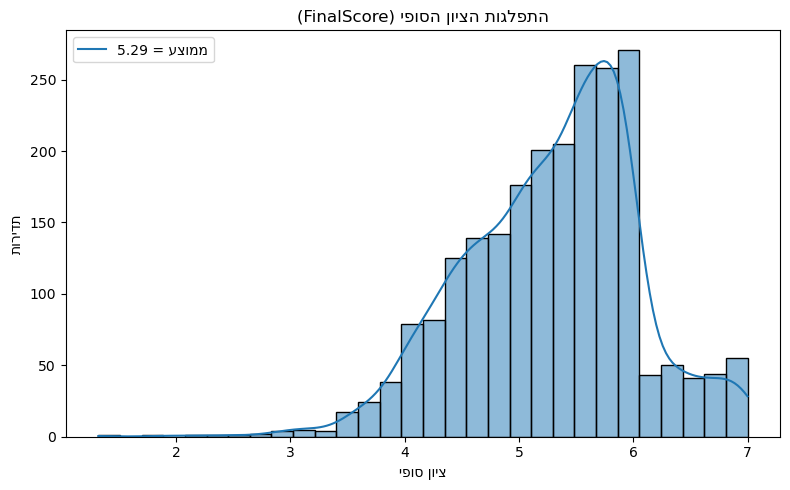

In [32]:
# pip install python-bidi
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['axes.unicode_minus'] = False

he = lambda s: get_display(s)   # הופך את המחרוזת לעברית מוצגת נכון

plt.figure(figsize=(8,5))
sb.histplot(df2['FinalScore'], bins=30, kde=True)
plt.title(he('התפלגות הציון הסופי (FinalScore)'))
plt.xlabel(he('ציון סופי'))
plt.ylabel(he('תדירות'))
plt.legend([he(f'ממוצע = {df2["FinalScore"].mean():.2f}')])
plt.tight_layout()
plt.show()


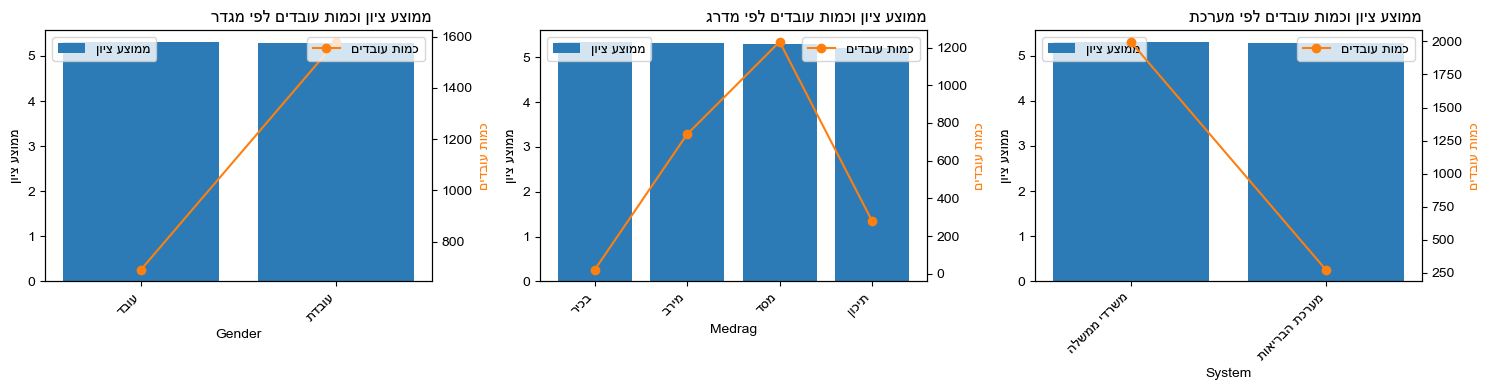

In [33]:

from bidi.algorithm import get_display
import arabic_reshaper

# פונקציה שתסדר טקסט עברי נכון
def heb(text):
    return get_display(arabic_reshaper.reshape(text))
    
bar_color = '#2C7BB6'     
line_color = '#FF7F0E'   

# הגדרות כלליות לעברית
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.titlelocation'] = 'right'

# DataFrame עבודה
dfw = df2.copy()
dfw['FinalScore'] = pd.to_numeric(dfw['FinalScore'], errors='coerce')

groups = ['Gender', 'Medrag', 'System']
plt.figure(figsize=(15,4))

for i, col in enumerate(groups, 1):
    plt.subplot(1, 3, i)

    # חישוב ממוצע וכמות
    mean_scores = dfw.groupby(col)['FinalScore'].mean().sort_values(ascending=False)
    counts = dfw[col].value_counts().reindex(mean_scores.index)

    ax = plt.gca()
    bars = ax.bar(mean_scores.index, mean_scores.values, color=bar_color, label=heb('ממוצע ציון'))
    ax.set_ylabel(heb('ממוצע ציון'), fontsize=10)
    ax.set_xlabel(heb(col), fontsize=10)
    ax.set_xticklabels([heb(lbl) for lbl in mean_scores.index], rotation=45, ha='right')

    # ציר משני לכמות
    ax2 = ax.twinx()
    ax2.plot(mean_scores.index, counts.values, color=line_color, marker='o', label=heb('כמות עובדים'))
    ax2.set_ylabel(heb('כמות עובדים'), fontsize=10, color=line_color)

    # כותרת
    title_map = {'Gender': 'מגדר', 'Medrag': 'מדרג', 'System': 'מערכת'}
    plt.title(heb(f"ממוצע ציון וכמות עובדים לפי {title_map[col]}"), fontsize=12, loc='right')

    # מקרא משולב
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## שיעור המצטיינים והפערים בציונים לפי פרמטרים נבחרים

In [34]:
(df2['Excellent'].value_counts(normalize=True) * 100).round(1)

Excellent
0    84.1
1    15.9
Name: proportion, dtype: float64

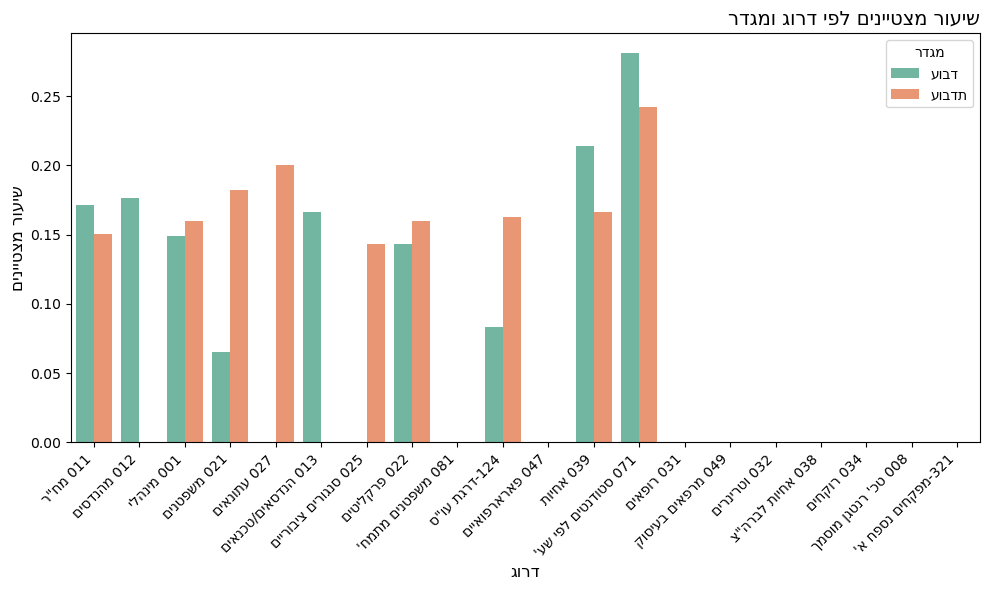

In [35]:
# pip install python-bidi
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['font.family'] = 'DejaVu Sans'  
matplotlib.rcParams['axes.unicode_minus'] = False

he = lambda s: get_display(str(s))  # מסדר RTL לכל טקסט קיים

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df2, x='Derog', y='Excellent', hue='Gender', ci=None, palette='Set2')

# כותרות/מקרא בעברית תקינה
ax.set_xlabel(he('דרוג'), fontsize=12)
ax.set_ylabel(he('שיעור מצטיינים'), fontsize=12)
ax.set_title(he('שיעור מצטיינים לפי דרוג ומגדר'), fontsize=14)
ax.legend(title=he('מגדר'))

xticklabels = [he(t.get_text()) for t in ax.get_xticklabels()]
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [36]:
df2['Excellent'].value_counts()


Excellent
0    1908
1     362
Name: count, dtype: int64

In [37]:
from scipy.stats import ttest_ind

group1 = df2[df2['Excellent'] == 1]['FinalScore']
group0 = df2[df2['Excellent'] == 0]['FinalScore']

t_stat, p_value = ttest_ind(group1, group0, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"ממוצע מצטיינים: {group1.mean():.2f}")
print(f"ממוצע לא מצטיינים: {group0.mean():.2f}")


T-statistic: 30.562
P-value: 0.00000
ממוצע מצטיינים: 6.19
ממוצע לא מצטיינים: 5.12


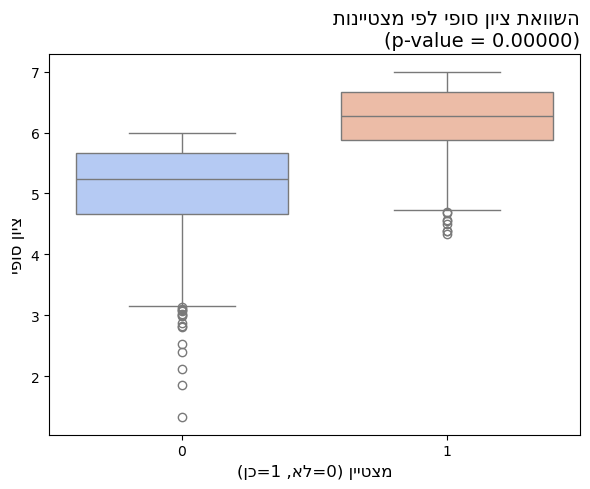

In [38]:
# pip install python-bidi
from bidi.algorithm import get_display

# הגדרות כלליות לגופן
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rcParams['axes.unicode_minus'] = False

# פונקציה לעברית תקינה
he = lambda s: get_display(s)

# === גרף Boxplot מצטיינים ===
plt.figure(figsize=(6,5))
sb.boxplot(data=df2, x='Excellent', y='FinalScore', palette='coolwarm')

plt.xlabel(he('מצטיין (0=לא, 1=כן)'), fontsize=12)
plt.ylabel(he('ציון סופי'), fontsize=12)
plt.title(he(f'השוואת ציון סופי לפי מצטיינות\n(p-value = {p_value:.5f})'), fontsize=14)

plt.tight_layout()
plt.show()


#### למצטיינים יש ציון סופי גבוה משמעותית משאר העובדים, וההבדל מובהק סטטיסטית.

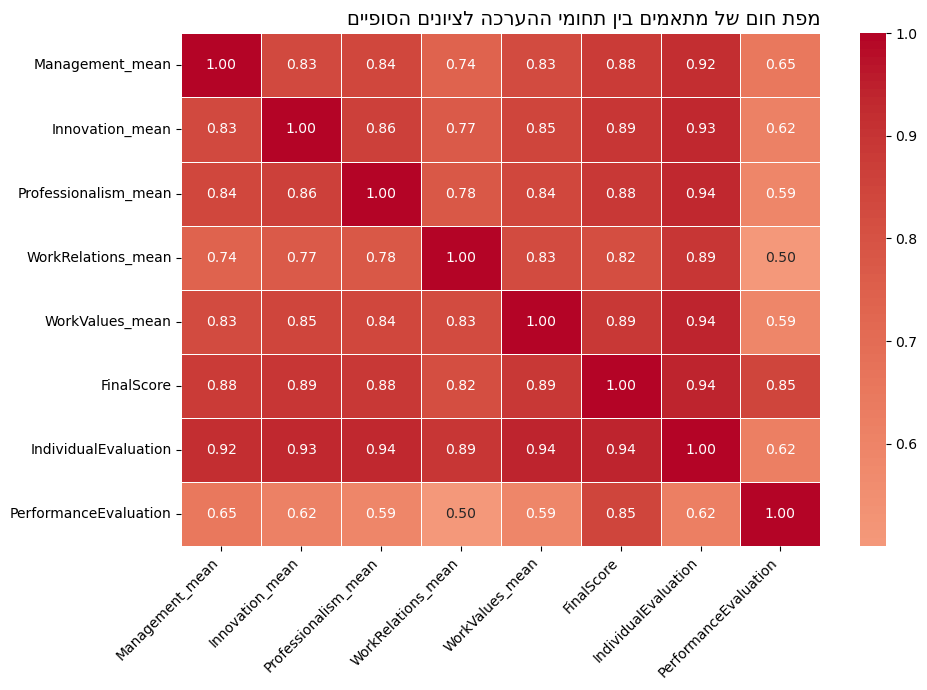

In [39]:
cols = [
    'Management_mean',
    'Innovation_mean',
    'Professionalism_mean',
    'WorkRelations_mean',
    'WorkValues_mean',
    'FinalScore',
    'IndividualEvaluation',
    'PerformanceEvaluation'
]

# חישוב מטריצת המתאם
corr = df2[cols].corr()
# ציור מפת החום
plt.figure(figsize=(10, 7))
sb.heatmap(
    corr,
    annot=True,            # מציג ערכי מתאם על המשבצות
    cmap='coolwarm',       
    center=0,
    fmt=".2f",
    linewidths=0.5
)

plt.title(he('מפת חום של מתאמים בין תחומי ההערכה לציונים הסופיים'), fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [40]:
#מפת החום מדגישה מתאם גבוה (0.8–0.9) בין כל תחומי הערכה רכים לבין הציונים הסופיים, במיוחד Professionalism ו-WorkValues.
#לעומת זאת, PerformanceEvaluation מראה מתאם בינוני בלבד (0.5–0.65), מה שמרמז על פער בין תפיסת “ביצוע” לבין תחומי מצוינות אחרים.

#### המלצה: פילוח עומק: לבצע ניתוחי עומק לתחומי הערכת עובד אחרים ופרמטרים אחרים